In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
  

prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    #priceData = get_price_data(param)
    #stock = StockDataFrame.retype(priceData)
    #price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #stock.get(string)
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    price=price.drop(['Unnamed: 0'],axis=1)
   
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    print(file)
    prices.append(price)

AAPL
AMZN
GOOGL
MSFT
FB
INTC
CSCO
CMCSA
NVDA
NFLX
ADBE
AMGN
TXN
AVGO
PYPL
GILD
COST
QCOM


In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL
4.883029404294328
0.0
Diff in tren train and test
0.5266927083333334
0.5178105994787141
F1,score 0.5335570469798657
G-score: 0.5160405424631157
Accuracy 0.5169417897480452
Window: 4
[[277 278]
 [278 318]]
Vol pos 0.4867313853375362
Vol neg 0.4789939733788734


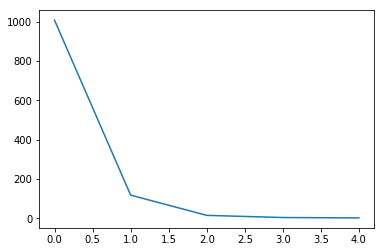

Real Percentage of gain: -3.240674967868531
Percentage of gain: 0.020229821961060324
Total gain: 23.284525077180433
000000000000000000000000000000000000000000000000
Percentile:  0
[[248 243]
 [248 269]]
0.5128968253968254
Percentile:  1
[[25 29]
 [25 39]]
0.5423728813559322
Percentile:  2
[[4 4]
 [4 3]]
0.4666666666666667
Percentile:  3
[[0 2]
 [0 2]]
0.5
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMZN
7.30254087059288
0.00014385969546357427
Diff in tren train and test
0.5309311916648578
0.5021720243266724
F1,score 0.474468085106383
G-score: 0.5405751357972582
Accuracy 0.5708079930495221
Window: 4
[[434 139]
 [355 223]]
Vol pos 0.6116009188555995
Vol neg 0.6214779064218319


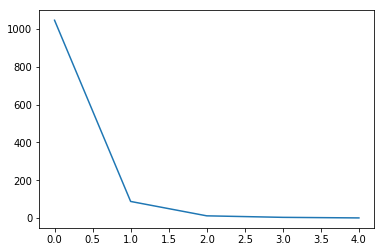

Real Percentage of gain: 10.095481294618295
Percentage of gain: 0.08237334310664113
Total gain: 94.81171791574394
000000000000000000000000000000000000000000000000
Percentile:  0
[[394 126]
 [313 211]]
0.5795019157088123
Percentile:  1
[[34  9]
 [37  8]]
0.4772727272727273
Percentile:  2
[[4 4]
 [4 0]]
0.3333333333333333
Percentile:  3
[[1 0]
 [0 3]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.2472118959107856
0.0
Diff in tren train and test
0.5286582718193661
0.5082536924413553
F1,score 0.49169435215946844
G-score: 0.46608255034351
Accuracy 0.46828844483058213
Window: 4
[[243 323]
 [289 296]]
Vol pos 0.5863204475229998
Vol neg 0.5600207078530857


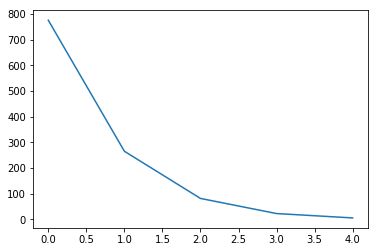

Real Percentage of gain: -6.986835597644971
Percentage of gain: -0.0232023909567259
Total gain: -26.70595199119151
000000000000000000000000000000000000000000000000
Percentile:  0
[[157 203]
 [215 201]]
0.46134020618556704
Percentile:  1
[[62 85]
 [54 64]]
0.47547169811320755
Percentile:  2
[[18 22]
 [16 25]]
0.5308641975308642
Percentile:  3
[[ 5 11]
 [ 3  3]]
0.36363636363636365
Percentile:  4
[[1 1]
 [1 2]]
0.6
000000000000000000000000000000000000000000000000
Working on... MSFT
4.653802497162325
0.0
Diff in tren train and test
0.5319010416666666
0.5230234578627281
F1,score 0.5171503957783642
G-score: 0.5234372258630829
Accuracy 0.5230234578627281
Window: 4
[[308 241]
 [308 294]]
Vol pos 0.5596408642894449
Vol neg 0.5449000036319203


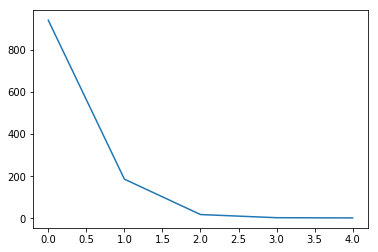

Real Percentage of gain: 2.113792664289413
Percentage of gain: 0.032800780459010935
Total gain: 37.75369830832159
000000000000000000000000000000000000000000000000
Percentile:  0
[[240 196]
 [256 248]]
0.5191489361702127
Percentile:  1
[[60 41]
 [45 40]]
0.5376344086021505
Percentile:  2
[[6 4]
 [5 3]]
0.5
Percentile:  3
[[2 0]
 [0 1]]
1.0
Percentile:  4
[[0 0]
 [2 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... FB
8.273442632816934
0.0
Diff in tren train and test
0.5279947916666666
0.5099913119026933
F1,score 0.6200873362445416
G-score: 0.5110862721407913
Accuracy 0.5464813205907906
Window: 4
[[203 361]
 [161 426]]
Vol pos 0.6882173784626605
Vol neg 0.704332852532588


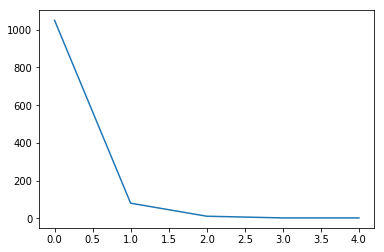

Real Percentage of gain: 6.347022444583499
Percentage of gain: 0.05666983669070589
Total gain: 65.22698203100248
000000000000000000000000000000000000000000000000
Percentile:  0
[[188 325]
 [151 386]]
0.5466666666666666
Percentile:  1
[[11 33]
 [ 7 30]]
0.5061728395061729
Percentile:  2
[[2 2]
 [1 7]]
0.75
Percentile:  3
[[2 1]
 [0 0]]
0.6666666666666666
Percentile:  4
[[0 0]
 [1 2]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... INTC
5.0417163527703455
0.0
Diff in tren train and test
0.5442708333333334
0.5195482189400521
F1,score 0.0732824427480916
G-score: 0.19426480881685632
Accuracy 0.472632493483927
Window: 4
[[520  33]
 [574  24]]
Vol pos 0.668150987171013
Vol neg 0.6684607547216808


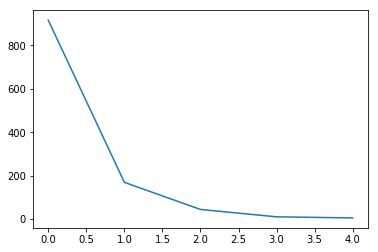

Real Percentage of gain: -1.4547602871238263
Percentage of gain: -0.03673461433104186
Total gain: -42.28154109502918
000000000000000000000000000000000000000000000000
Percentile:  0
[[416  24]
 [456  20]]
0.4759825327510917
Percentile:  1
[[72  7]
 [88  2]]
0.4378698224852071
Percentile:  2
[[25  2]
 [16  1]]
0.5909090909090909
Percentile:  3
[[5 0]
 [5 0]]
0.5
Percentile:  4
[[1 0]
 [4 0]]
0.2
000000000000000000000000000000000000000000000000
Working on... CSCO
2.5968809887196964
0.0
Diff in tren train and test
0.5482960711960061
0.526498696785404
F1,score 0.4492890995260663
G-score: 0.48883436204713626
Accuracy 0.4952215464813206
Window: 4
[[333 212]
 [369 237]]
Vol pos 0.5164030769532671
Vol neg 0.4898061097353649


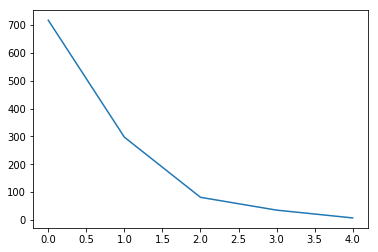

Real Percentage of gain: 3.1356805212665453
Percentage of gain: 0.008490359780291244
Total gain: 9.772404107115221
000000000000000000000000000000000000000000000000
Percentile:  0
[[200 134]
 [234 149]]
0.48675034867503486
Percentile:  1
[[90 51]
 [89 67]]
0.5286195286195287
Percentile:  2
[[25 18]
 [24 14]]
0.48148148148148145
Percentile:  3
[[12  9]
 [11  3]]
0.42857142857142855
Percentile:  4
[[5 0]
 [1 1]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.300751879699248
0.0
Diff in tren train and test
0.5194269589754721
0.46481320590790615
F1,score 0.11987381703470032
G-score: 0.2529711778012569
Accuracy 0.5152041702867072
Window: 4
[[555  61]
 [497  38]]
Vol pos 0.525300520053046
Vol neg 0.4721180061787032


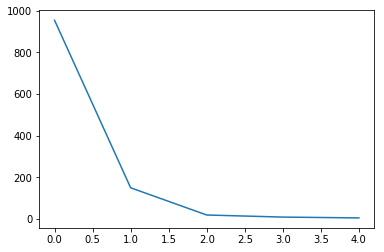

Real Percentage of gain: 1.0559942569993315
Percentage of gain: 0.04175617805711545
Total gain: 48.061360943739885
000000000000000000000000000000000000000000000000
Percentile:  0
[[453  54]
 [415  33]]
0.5089005235602094
Percentile:  1
[[85  5]
 [56  3]]
0.5906040268456376
Percentile:  2
[[11  0]
 [ 7  0]]
0.6111111111111112
Percentile:  3
[[5 1]
 [2 0]]
0.625
Percentile:  4
[[1 1]
 [2 0]]
0.25
000000000000000000000000000000000000000000000000
Working on... NVDA
4.874774510215212
0.0
Diff in tren train and test
0.5308159722222222
0.525629887054735
F1,score 0.5219594594594594
G-score: 0.5081123748256017
Accuracy 0.5082536924413553
Window: 4
[[276 270]
 [296 309]]
Vol pos 0.786087282949567
Vol neg 0.7586464166211061


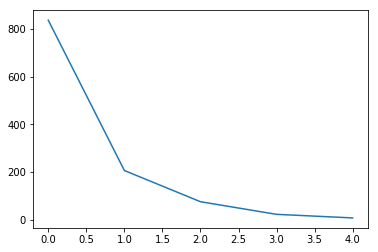

Real Percentage of gain: 13.065177671615402
Percentage of gain: 0.026470190024283746
Total gain: 30.46718871795059
000000000000000000000000000000000000000000000000
Percentile:  0
[[212 182]
 [234 209]]
0.5029868578255675
Percentile:  1
[[44 55]
 [42 65]]
0.529126213592233
Percentile:  2
[[15 19]
 [14 27]]
0.56
Percentile:  3
[[3 9]
 [3 7]]
0.45454545454545453
Percentile:  4
[[2 4]
 [0 1]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... NFLX
7.381958838602277
0.0031497055025326483
Diff in tren train and test
0.5237681788582592
0.48045178105994785
F1,score 0.5893854748603352
G-score: 0.42418237965882644
Accuracy 0.4891398783666377
Window: 4
[[141 457]
 [131 422]]
Vol pos 0.7517130624044425
Vol neg 0.8352466108092637


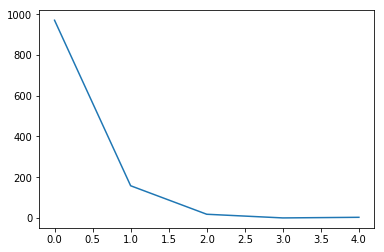

Real Percentage of gain: -3.7797754615362855
Percentage of gain: -0.059001349280752305
Total gain: -67.9105530221459
000000000000000000000000000000000000000000000000
Percentile:  0
[[124 388]
 [ 96 362]]
0.5010309278350515
Percentile:  1
[[15 62]
 [29 52]]
0.4240506329113924
Percentile:  2
[[2 7]
 [4 5]]
0.3888888888888889
Percentile:  3
Percentile:  4
[[0 0]
 [1 3]]
0.75
000000000000000000000000000000000000000000000000
Working on... ADBE
4.173036117638998
0.0
Diff in tren train and test
0.5523230568823274
0.5369244135534318
F1,score 0.6469038208168643
G-score: 0.4299260361204491
Accuracy 0.5343179843614249
Window: 4
[[124 409]
 [127 491]]
Vol pos 0.5818250911225873
Vol neg 0.6261139228781208


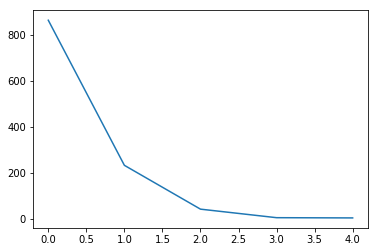

Real Percentage of gain: 3.2726564215926457
Percentage of gain: 0.01930961631426445
Total gain: 22.225368377718382
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 96 283]
 [104 379]]
0.5510440835266821
Percentile:  1
[[ 23 109]
 [ 15  86]]
0.4678111587982833
Percentile:  2
[[ 5 15]
 [ 5 18]]
0.5348837209302325
Percentile:  3
[[0 2]
 [2 2]]
0.3333333333333333
Percentile:  4
[[0 0]
 [1 4]]
0.8
000000000000000000000000000000000000000000000000
Working on... AMGN
3.3162393162393125
0.0
Diff in tren train and test
0.5216069489685125
0.46655082536924414
F1,score 0.5021061499578771
G-score: 0.48661719306804696
Accuracy 0.48653344917463076
Window: 4
[[262 352]
 [239 298]]
Vol pos 0.4897482287311488
Vol neg 0.4820061474998599


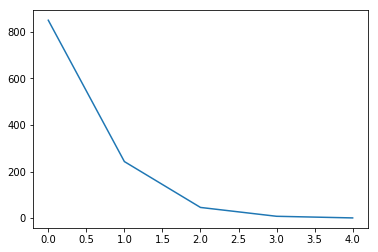

Real Percentage of gain: 1.3735434992862192
Percentage of gain: -0.009215139081645432
Total gain: -10.606625082973892
000000000000000000000000000000000000000000000000
Percentile:  0
[[194 258]
 [180 218]]
0.48470588235294115
Percentile:  1
[[54 72]
 [53 64]]
0.48559670781893005
Percentile:  2
[[10 20]
 [ 5 11]]
0.45652173913043476
Percentile:  3
[[4 0]
 [0 4]]
1.0
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... TXN
3.882943460554985
0.0
Diff in tren train and test
0.5555796786799826
0.525629887054735
F1,score 0.5004468275245754
G-score: 0.51425947722658
Accuracy 0.5143353605560382
Window: 4
[[312 234]
 [325 280]]
Vol pos 0.625423478024719
Vol neg 0.5778150245883812


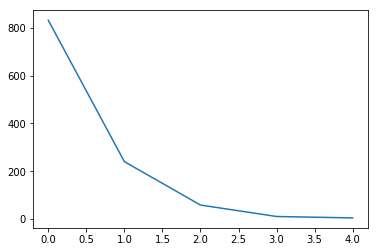

Real Percentage of gain: -1.4225988992533156
Percentage of gain: 0.0410530844880352
Total gain: 47.25210024572851
000000000000000000000000000000000000000000000000
Percentile:  0
[[218 158]
 [254 203]]
0.5054021608643458
Percentile:  1
[[63 59]
 [57 61]]
0.5166666666666667
Percentile:  2
[[27 14]
 [ 6 11]]
0.6551724137931034
Percentile:  3
[[3 2]
 [4 1]]
0.4
Percentile:  4
[[1 1]
 [1 1]]
0.5
000000000000000000000000000000000000000000000000
Working on... AVGO
4.914180200595917
0.0
Diff in tren train and test
0.5301780286582718
0.4917463075586447
F1,score 0.5868263473053892
G-score: 0.49504201254358404
Accuracy 0.5204170286707211
Window: 4
[[207 378]
 [174 392]]
Vol pos 0.6366400888619249
Vol neg 0.628003471075177


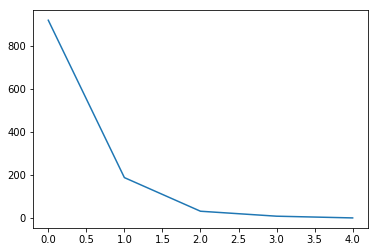

Real Percentage of gain: 5.407167239880202
Percentage of gain: 0.03013857271485262
Total gain: 34.689497194795365
000000000000000000000000000000000000000000000000
Percentile:  0
[[158 302]
 [145 313]]
0.5130718954248366
Percentile:  1
[[36 68]
 [17 67]]
0.5478723404255319
Percentile:  2
[[11  8]
 [ 4  9]]
0.625
Percentile:  3
[[2 0]
 [5 2]]
0.4444444444444444
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... PYPL
4.9430161675059505
0.0
Diff in tren train and test
0.5422183633601042
0.49695916594265854
F1,score 0.474934036939314
G-score: 0.48117577651330795
Accuracy 0.48132059079061684
Window: 4
[[284 295]
 [302 270]]
Vol pos 0.5763067888502408
Vol neg 0.6064021875961226


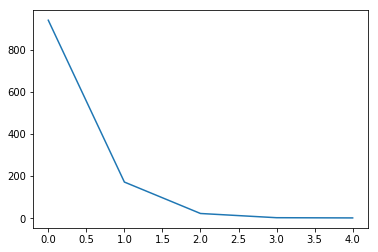

Real Percentage of gain: 1.6483904542412915
Percentage of gain: -0.03714000431959326
Total gain: -42.74814497185184
000000000000000000000000000000000000000000000000
Percentile:  0
[[240 230]
 [254 215]]
0.4845580404685836
Percentile:  1
[[37 59]
 [37 39]]
0.4418604651162791
Percentile:  2
[[3 6]
 [6 8]]
0.4782608695652174
Percentile:  3
[[1 0]
 [2 0]]
0.3333333333333333
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.47230206192292
0.0
Diff in tren train and test
0.5082501085540599
0.48132059079061684
F1,score 0.5705128205128206
G-score: 0.5279986755040077
Accuracy 0.5343179843614249
Window: 4
[[259 338]
 [198 356]]
Vol pos 0.5065746857882031
Vol neg 0.48445222999566645


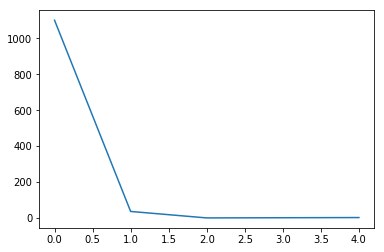

Real Percentage of gain: 7.311582702490185
Percentage of gain: 0.045071274093890265
Total gain: 51.877036482067695
000000000000000000000000000000000000000000000000
Percentile:  0
[[251 318]
 [188 344]]
0.5404178019981835
Percentile:  1
[[ 4 20]
 [ 6  6]]
0.2777777777777778
Percentile:  2
Percentile:  3
[[1]]
1.0
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... COST
2.961469058486367
0.001630744978656757
Diff in tren train and test
0.5237681788582592
0.5308427454387489
F1,score 0.5369774919614148
G-score: 0.4939287089221322
Accuracy 0.49956559513466553
Window: 4
[[241 299]
 [277 334]]
Vol pos 0.41812756676359364
Vol neg 0.3822393274237514


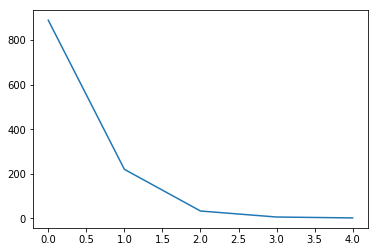

Real Percentage of gain: 2.504092594561079
Percentage of gain: 0.017596436397033483
Total gain: 20.25349829298554
000000000000000000000000000000000000000000000000
Percentile:  0
[[189 228]
 [222 255]]
0.4966442953020134
Percentile:  1
[[43 58]
 [46 67]]
0.514018691588785
Percentile:  2
[[ 9 12]
 [ 6  6]]
0.45454545454545453
Percentile:  3
[[0 1]
 [2 3]]
0.5
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... QCOM
5.312400888043135
0.0
Diff in tren train and test
0.5234375
0.47089487402258906
F1,score 0.6037735849056604
G-score: 0.44602107262969726
Accuracy 0.5073848827106864
Window: 4
[[152 457]
 [110 432]]
Vol pos 0.5472752304091909
Vol neg 0.6267185236663041


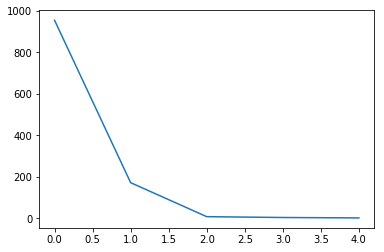

Real Percentage of gain: -5.403537598030032
Percentage of gain: -0.031051840451630654
Total gain: -35.740668359826884
000000000000000000000000000000000000000000000000
Percentile:  0
[[125 371]
 [ 91 368]]
0.5162303664921466
Percentile:  1
[[26 75]
 [17 54]]
0.46511627906976744
Percentile:  2
[[0 5]
 [1 2]]
0.25
Percentile:  3
[[0 4]
 [0 0]]
0.0
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5102326479389903
Mean gain over portfolio :  14.426771842851688
Real mean gain over portfolio 1.9467999418870638


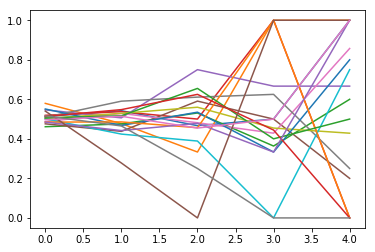

In [3]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[4]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

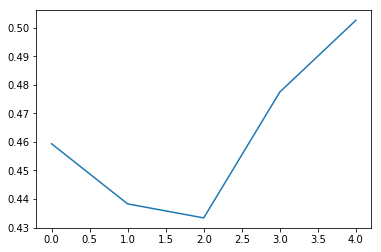

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
6.2151820652697705
0.005611672278333842
Diff in tren train and test
0.5457715780296426
0.5387968613775065
F1,score 0.5927672955974842
G-score: 0.5390746032447894
Accuracy 0.5483870967741935
Window: 28
[[252 277]
 [241 377]]
Vol pos 1.5436865947632683
Vol neg 1.4238352233291074


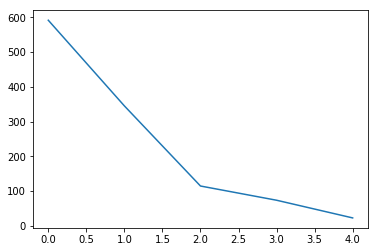

Real Percentage of gain: 36.3349134178194
Percentage of gain: 0.20351545110864702
Total gain: 233.4322224216181
000000000000000000000000000000000000000000000000
Percentile:  0
[[106 165]
 [118 204]]
0.5227655986509275
Percentile:  1
[[ 87  68]
 [ 79 109]]
0.5714285714285714
Percentile:  2
[[40 28]
 [15 31]]
0.6228070175438597
Percentile:  3
[[19 15]
 [19 20]]
0.5342465753424658
Percentile:  4
[[ 0  0]
 [10 12]]
0.5454545454545454
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.0007301135326536637
Diff in tren train and test
0.5841325196163906
0.5008726003490401
F1,score 0.6444708680142688
G-score: 0.09952250708721386
Accuracy 0.4781849912739965
Window: 28
[[  6 566]
 [ 32 542]]
Vol pos 1.8294423781059395
Vol neg 1.7079906795236766


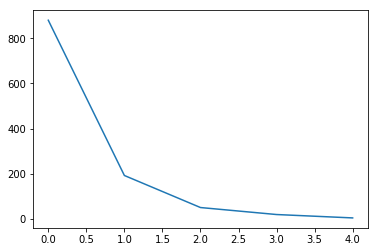

Real Percentage of gain: -1.1645232020164495
Percentage of gain: -0.01644328372871188
Total gain: -18.844003153103813
000000000000000000000000000000000000000000000000
Percentile:  0
[[  5 461]
 [ 22 391]]
0.45051194539249145
Percentile:  1
[[  1  63]
 [  6 122]]
0.640625
Percentile:  2
[[ 0 21]
 [ 4 25]]
0.5
Percentile:  3
[[ 0 16]
 [ 0  3]]
0.15789473684210525
Percentile:  4
[[0 4]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
6.578625810696505
0.00046371220166928405
Diff in tren train and test
0.5735775016350556
0.49214659685863876
F1,score 0.5725368502715282
G-score: 0.5040415731225364
Accuracy 0.5191972076788831
Window: 28
[[226 356]
 [195 369]]
Vol pos 1.5825842564481412
Vol neg 1.4619664450682803


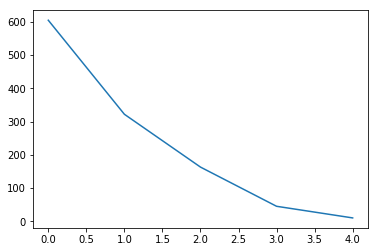

Real Percentage of gain: 20.909111435096204
Percentage of gain: 0.11875577779583035
Total gain: 136.09412135402158
000000000000000000000000000000000000000000000000
Percentile:  0
[[107 205]
 [107 186]]
0.484297520661157
Percentile:  1
[[ 67  70]
 [ 75 109]]
0.5482866043613707
Percentile:  2
[[38 45]
 [12 68]]
0.6503067484662577
Percentile:  3
[[12 26]
 [ 1  6]]
0.4
Percentile:  4
[[ 1 10]
 [ 0  0]]
0.09090909090909091
000000000000000000000000000000000000000000000000
Working on... MSFT
7.763904653802501
0.0
Diff in tren train and test
0.5719267654751525
0.5213600697471665
F1,score 0.5400696864111498
G-score: 0.5401611216288131
Accuracy 0.5396687009590235
Window: 28
[[309 240]
 [288 310]]
Vol pos 1.43341715269297
Vol neg 1.275564009558404


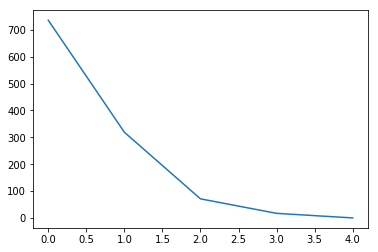

Real Percentage of gain: 19.9551069791136
Percentage of gain: 0.18638833519626086
Total gain: 213.78742047011121
000000000000000000000000000000000000000000000000
Percentile:  0
[[190 150]
 [207 189]]
0.5149456521739131
Percentile:  1
[[91 75]
 [65 88]]
0.5611285266457681
Percentile:  2
[[19 14]
 [13 25]]
0.6197183098591549
Percentile:  3
[[9 1]
 [3 4]]
0.7647058823529411
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0030394212941828227
Diff in tren train and test
0.5571054925893636
0.4995640802092415
F1,score 0.6429042904290428
G-score: 0.4197635306932712
Accuracy 0.5283347863993025
Window: 28
[[119 455]
 [ 86 487]]
Vol pos 2.1286635018983
Vol neg 1.7373333334071093


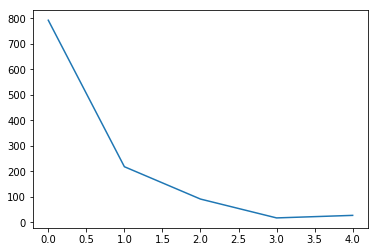

Real Percentage of gain: 9.222748344699648
Percentage of gain: 0.3052072787943537
Total gain: 350.0727487771237
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 76 322]
 [ 69 325]]
0.5063131313131313
Percentile:  1
[[ 22  79]
 [ 15 102]]
0.5688073394495413
Percentile:  2
[[16 42]
 [ 2 31]]
0.5164835164835165
Percentile:  3
[[ 3 12]
 [ 0  2]]
0.29411764705882354
Percentile:  4
[[ 2  0]
 [ 0 25]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5775937227550131
0.5510026155187445
F1,score 0.4751474304970514
G-score: 0.45789940952055985
Accuracy 0.45684394071490847
Window: 28
[[242 273]
 [350 282]]
Vol pos 1.6069995040132095
Vol neg 1.8068734275752762


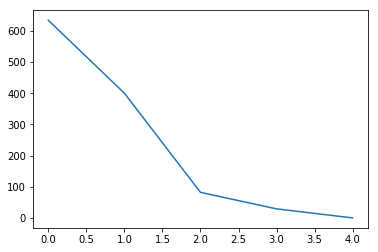

Real Percentage of gain: -11.805098514164225
Percentage of gain: -0.2472662644084353
Total gain: -283.6144052764753
000000000000000000000000000000000000000000000000
Percentile:  0
[[152 155]
 [173 154]]
0.48264984227129337
Percentile:  1
[[ 75  64]
 [161 100]]
0.4375
Percentile:  2
[[13 28]
 [16 25]]
0.4634146341463415
Percentile:  3
[[ 2 26]
 [ 0  1]]
0.10344827586206896
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.12474713418746
0.0
Diff in tren train and test
0.5954664341761116
0.5349040139616056
F1,score 0.5404376784015222
G-score: 0.5739643696158511
Accuracy 0.5785340314136126
Window: 28
[[379 154]
 [329 284]]
Vol pos 1.3243310995475555
Vol neg 1.1568227518937129


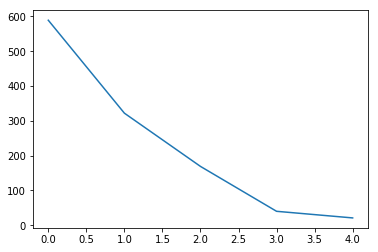

Real Percentage of gain: 17.395532291172458
Percentage of gain: 0.2786091883380158
Total gain: 319.28612983536607
000000000000000000000000000000000000000000000000
Percentile:  0
[[197  89]
 [170 133]]
0.5602716468590832
Percentile:  1
[[103  32]
 [102  85]]
0.5838509316770186
Percentile:  2
[[44 25]
 [51 49]]
0.5502958579881657
Percentile:  3
[[13  8]
 [ 4 15]]
0.7
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
6.2081025939959265
0.0
Diff in tren train and test
0.5021795989537925
0.4048865619546248
F1,score 0.565149136577708
G-score: 0.5137408089380562
Accuracy 0.5165794066317626
Window: 28
[[232 450]
 [104 360]]
Vol pos 1.4196195722977927
Vol neg 1.3984507543545928


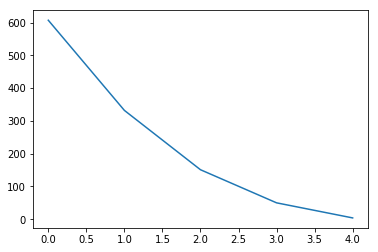

Real Percentage of gain: -2.8614501076812693
Percentage of gain: 0.05730634283407399
Total gain: 65.67306888784879
000000000000000000000000000000000000000000000000
Percentile:  0
[[101 227]
 [ 75 204]]
0.5024711696869851
Percentile:  1
[[ 76 127]
 [ 23 106]]
0.5481927710843374
Percentile:  2
[[33 73]
 [ 3 42]]
0.4966887417218543
Percentile:  3
[[19 21]
 [ 3  7]]
0.52
Percentile:  4
[[3 1]
 [0 0]]
0.75
000000000000000000000000000000000000000000000000
Working on... NVDA
11.376618273940428
0.002483103323611454
Diff in tren train and test
0.590671316477768
0.5483870967741935
F1,score 0.6096333572969087
G-score: 0.4839817418541565
Accuracy 0.5265911072362686
Window: 28
[[180 338]
 [205 424]]
Vol pos 2.0224132271651825
Vol neg 2.1901657277892768


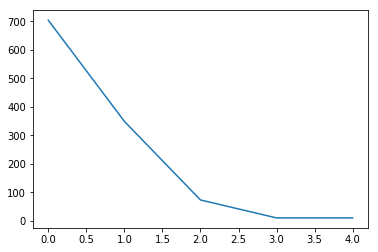

Real Percentage of gain: 28.04291259272733
Percentage of gain: 0.02814088842039482
Total gain: 32.27759901819286
000000000000000000000000000000000000000000000000
Percentile:  0
[[119 196]
 [133 258]]
0.5339943342776204
Percentile:  1
[[ 50 107]
 [ 52 137]]
0.5404624277456648
Percentile:  2
[[ 6 19]
 [19 29]]
0.4794520547945205
Percentile:  3
[[1 8]
 [1 0]]
0.1
Percentile:  4
[[4 6]
 [0 0]]
0.4
000000000000000000000000000000000000000000000000
Working on... NFLX
11.430097056883495
0.001406110187899634
Diff in tren train and test
0.5786835222319093
0.4973821989528796
F1,score 0.5725368502715283
G-score: 0.5039863023758246
Accuracy 0.5191972076788831
Window: 28
[[226 350]
 [201 369]]
Vol pos 1.938407884820143
Vol neg 2.3231688937031842


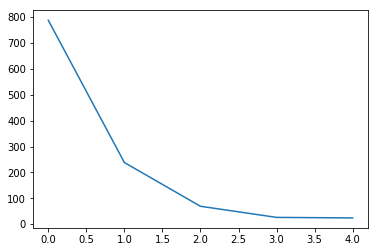

Real Percentage of gain: 71.24372337290015
Percentage of gain: -0.11057012998470271
Total gain: -126.7133689624693
000000000000000000000000000000000000000000000000
Percentile:  0
[[176 238]
 [125 248]]
0.5387547649301143
Percentile:  1
[[44 58]
 [49 87]]
0.5504201680672269
Percentile:  2
[[ 0 33]
 [15 21]]
0.30434782608695654
Percentile:  3
[[ 2 15]
 [ 5  4]]
0.23076923076923078
Percentile:  4
[[4 6]
 [6 9]]
0.52
000000000000000000000000000000000000000000000000
Working on... ADBE
8.329012614180083
0.0
Diff in tren train and test
0.5864399389579246
0.5776614310645725
F1,score 0.6970443349753694
G-score: 0.39427376143528836
Accuracy 0.5706806282722513
Window: 28
[[ 88 396]
 [ 96 566]]
Vol pos 1.5903882530043618
Vol neg 1.5618958956847353


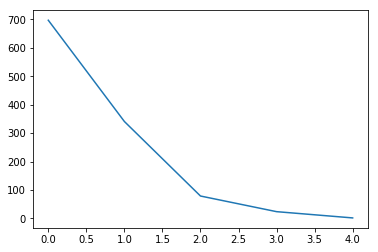

Real Percentage of gain: 22.252640976045175
Percentage of gain: 0.2370516027818175
Total gain: 271.66113678796285
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 60 243]
 [ 71 323]]
0.5494978479196556
Percentile:  1
[[ 26 103]
 [ 22 190]]
0.6334310850439883
Percentile:  2
[[ 1 33]
 [ 2 43]]
0.5569620253164557
Percentile:  3
[[ 1 15]
 [ 0  8]]
0.375
Percentile:  4
[[0 1]
 [0 1]]
0.5
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5146096816397733
0.4851657940663176
F1,score 0.588966588966589
G-score: 0.524378264539468
Accuracy 0.5383944153577661
Window: 28
[[238 352]
 [177 379]]
Vol pos 1.2246952472427772
Vol neg 1.2221182494969278


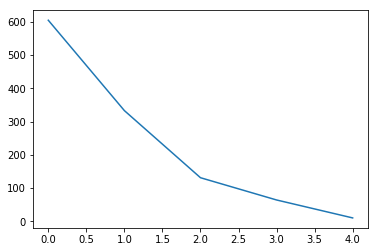

Real Percentage of gain: 5.736563349145577
Percentage of gain: 0.09523247256973709
Total gain: 109.13641356491871
000000000000000000000000000000000000000000000000
Percentile:  0
[[110 159]
 [122 214]]
0.5355371900826447
Percentile:  1
[[ 56 114]
 [ 44 119]]
0.5255255255255256
Percentile:  2
[[47 39]
 [ 8 37]]
0.6412213740458015
Percentile:  3
[[22 32]
 [ 2  8]]
0.46875
Percentile:  4
[[3 7]
 [0 0]]
0.3
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.004917387883551783
Diff in tren train and test
0.6524961848702856
0.555846422338569
F1,score 0.6467859509609012
G-score: 0.433746826365854
Accuracy 0.5349040139616056
Window: 28
[[125 384]
 [149 488]]
Vol pos 1.293759454107073
Vol neg 1.4818911653142417


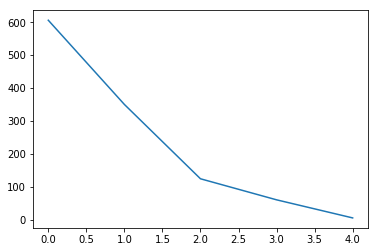

Real Percentage of gain: 15.76259011395057
Percentage of gain: 0.0028154923692364285
Total gain: 3.226554255144947
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 51 180]
 [ 90 285]]
0.5544554455445545
Percentile:  1
[[ 35 111]
 [ 47 156]]
0.5472779369627507
Percentile:  2
[[25 55]
 [11 33]]
0.46774193548387094
Percentile:  3
[[14 35]
 [ 1 10]]
0.4
Percentile:  4
[[0 3]
 [0 2]]
0.4
000000000000000000000000000000000000000000000000
Working on... AVGO
5.979850503737406
0.0
Diff in tren train and test
0.5168955744495313
0.4598603839441536
F1,score 0.6227730441518203
G-score: 0.5627674316422421
Accuracy 0.575043630017452
Window: 28
[[257 362]
 [125 402]]
Vol pos 1.9794618246100022
Vol neg 1.6707412914326654


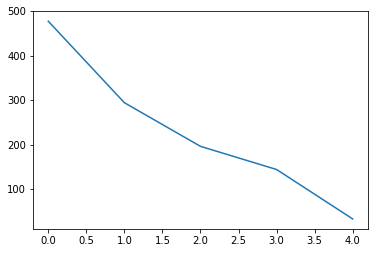

Real Percentage of gain: 60.52095477537585
Percentage of gain: 0.42828475871752475
Total gain: 490.81433349028333
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 92 176]
 [ 52 157]]
0.5220125786163522
Percentile:  1
[[ 61 106]
 [ 28  99]]
0.54421768707483
Percentile:  2
[[55 37]
 [19 85]]
0.7142857142857143
Percentile:  3
[[39 33]
 [22 50]]
0.6180555555555556
Percentile:  4
[[10 10]
 [ 4  9]]
0.5757575757575758
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5869659982563208
0.5279232111692844
F1,score 0.5095986038394414
G-score: 0.5103951414138378
Accuracy 0.5095986038394416
Window: 28
[[292 249]
 [313 292]]
Vol pos 1.756988814764882
Vol neg 1.4654435506280392


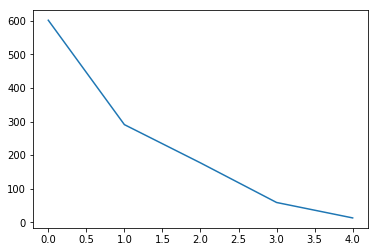

Real Percentage of gain: 7.0093301613263055
Percentage of gain: 0.17670348374322256
Total gain: 202.50219236973305
000000000000000000000000000000000000000000000000
Percentile:  0
[[129 133]
 [199 141]]
0.4485049833887043
Percentile:  1
[[78 49]
 [72 92]]
0.584192439862543
Percentile:  2
[[54 48]
 [31 44]]
0.5536723163841808
Percentile:  3
[[21 19]
 [10  9]]
0.5084745762711864
Percentile:  4
[[9 0]
 [0 4]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.500109003706126
0.4205933682373473
F1,score 0.42348008385744235
G-score: 0.49867343895598853
Accuracy 0.5200698080279232
Window: 28
[[394 270]
 [280 202]]
Vol pos 1.2838473595042426
Vol neg 1.2893811886547324


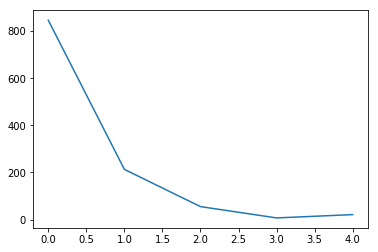

Real Percentage of gain: 37.70576255951462
Percentage of gain: 0.048877288398277194
Total gain: 56.01337250442566
000000000000000000000000000000000000000000000000
Percentile:  0
[[261 184]
 [232 169]]
0.508274231678487
Percentile:  1
[[89 52]
 [45 27]]
0.5446009389671361
Percentile:  2
[[29 20]
 [ 3  3]]
0.5818181818181818
Percentile:  3
[[4 3]
 [0 0]]
0.5714285714285714
Percentile:  4
[[11 10]
 [ 0  0]]
0.5238095238095238
000000000000000000000000000000000000000000000000
Working on... COST
3.9166758091058633
0.005161556725503719
Diff in tren train and test
0.5468613775065388
0.5383944153577661
F1,score 0.5345545378850958
G-score: 0.5114732398714051
Accuracy 0.512216404886562
Window: 28
[[266 263]
 [296 321]]
Vol pos 1.08807566146458
Vol neg 0.9862597160546637


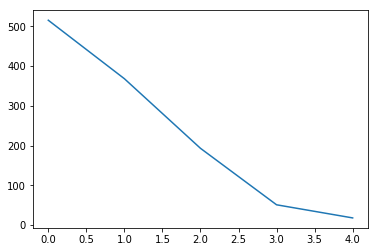

Real Percentage of gain: 12.321279615815067
Percentage of gain: 0.07624889354725257
Total gain: 87.38123200515145
000000000000000000000000000000000000000000000000
Percentile:  0
[[128 121]
 [146 122]]
0.4835589941972921
Percentile:  1
[[ 89  72]
 [105 100]]
0.5163934426229508
Percentile:  2
[[40 60]
 [29 65]]
0.5412371134020618
Percentile:  3
[[ 9 10]
 [ 8 23]]
0.64
Percentile:  4
[[0 0]
 [8 9]]
0.5294117647058824
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.001838201503657607
Diff in tren train and test
0.5143853530950305
0.45858761987794244
F1,score 0.6271186440677967
G-score: 0.37204698789210233
Accuracy 0.5013077593722755
Window: 28
[[ 94 527]
 [ 45 481]]
Vol pos 1.5646786878612766
Vol neg 1.689212572962276


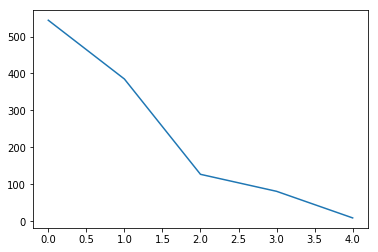

Real Percentage of gain: -9.16244214872172
Percentage of gain: -0.05801163575779237
Total gain: -66.53934621418784
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 20 218]
 [ 26 279]]
0.5506445672191529
Percentile:  1
[[ 37 185]
 [ 18 145]]
0.4727272727272727
Percentile:  2
[[12 82]
 [ 1 32]]
0.3464566929133858
Percentile:  3
[[20 39]
 [ 0 22]]
0.5185185185185185
Percentile:  4
[[5 2]
 [0 3]]
0.8
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5263185411386728
Mean gain over portfolio :  115.31374567420367
Real mean gain over portfolio 18.856647556228793


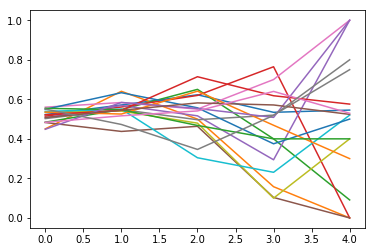

In [5]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

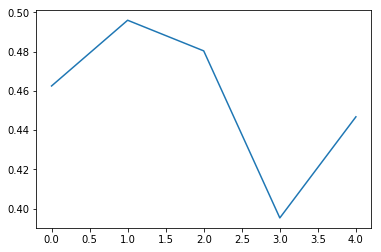

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.007052016153330417
Diff in tren train and test
0.6136919315403423
0.5195729537366548
F1,score 0.6466302367941712
G-score: 0.6548975427319971
Accuracy 0.6548042704626335
Window: 140
[[381 159]
 [229 355]]
Vol pos 4.1682233791339085
Vol neg 3.7023831947051122


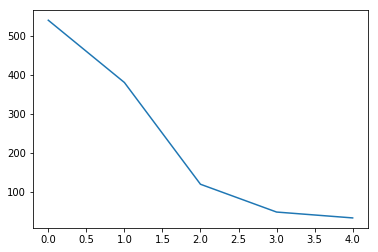

Real Percentage of gain: 110.72499619950538
Percentage of gain: 1.4513236009759547
Total gain: 1631.287727496973
000000000000000000000000000000000000000000000000
Percentile:  0
[[104 125]
 [122 187]]
0.5408921933085502
Percentile:  1
[[210  31]
 [ 28 112]]
0.8451443569553806
Percentile:  2
[[67  2]
 [43  7]]
0.6218487394957983
Percentile:  3
[[ 0  0]
 [12 37]]
0.7551020408163265
Percentile:  4
[[ 0  0]
 [23 12]]
0.34285714285714286
000000000000000000000000000000000000000000000000
Working on... AMZN
13.3857542610023
0.0006362658827865203
Diff in tren train and test
0.666073810582481
0.6147686832740213
F1,score 0.6443980514961726
G-score: 0.4817848654579403
Accuracy 0.5453736654804271
Window: 140
[[150 283]
 [228 463]]
Vol pos 3.6933603074876684
Vol neg 4.355099491534975


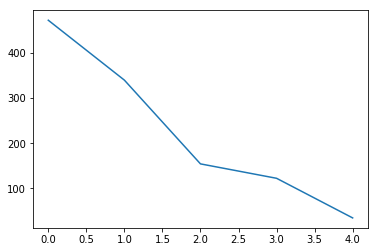

Real Percentage of gain: -11.190927523736185
Percentage of gain: 0.03431853052986502
Total gain: 38.574028315568285
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64 122]
 [ 85 201]]
0.5614406779661016
Percentile:  1
[[ 59  51]
 [ 85 145]]
0.6
Percentile:  2
[[ 0 15]
 [44 95]]
0.6168831168831169
Percentile:  3
[[ 9 80]
 [13 20]]
0.23770491803278687
Percentile:  4
[[17 15]
 [ 0  2]]
0.5588235294117647
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.498508957636181
0.0053143434128555215
Diff in tren train and test
0.6092950856126307
0.505338078291815
F1,score 0.7362045760430687
G-score: 0.5660671644371955
Accuracy 0.6512455516014235
Window: 140
[[185 371]
 [ 21 547]]
Vol pos 3.6690613112314905
Vol neg 3.9849769627365044


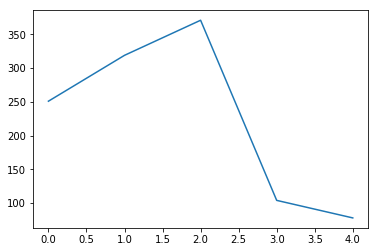

Real Percentage of gain: 92.52807918424573
Percentage of gain: 0.99968141497219
Total gain: 1123.6419104287415
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 23  63]
 [  5 160]]
0.7290836653386454
Percentile:  1
[[ 20  91]
 [  7 200]]
0.6918238993710691
Percentile:  2
[[ 53 147]
 [  6 165]]
0.5876010781671159
Percentile:  3
[[41 45]
 [ 2 16]]
0.5480769230769231
Percentile:  4
[[47 24]
 [ 1  6]]
0.6794871794871795
000000000000000000000000000000000000000000000000
Working on... MSFT
7.397080426878422
0.0
Diff in tren train and test
0.6877083796399199
0.5578291814946619
F1,score 0.564206268958544
G-score: 0.6088219579205708
Accuracy 0.6165480427046264
Window: 140
[[414  83]
 [348 279]]
Vol pos 2.5719368949591335
Vol neg 1.8302697849391514


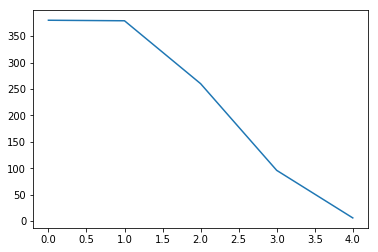

Real Percentage of gain: 97.28398670865563
Percentage of gain: 0.8839021271333678
Total gain: 993.5059908979055
000000000000000000000000000000000000000000000000
Percentile:  0
[[129  37]
 [154  60]]
0.49736842105263157
Percentile:  1
[[113  25]
 [141 100]]
0.5620052770448549
Percentile:  2
[[117  18]
 [ 40  85]]
0.7769230769230769
Percentile:  3
[[49  2]
 [12 33]]
0.8541666666666666
Percentile:  4
[[5 1]
 [0 0]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... FB
16.6080986105855
0.005436850975925257
Diff in tren train and test
0.5956879306512558
0.6201067615658363
F1,score 0.7632093933463798
G-score: 0.5881714506428418
Accuracy 0.6770462633451957
Window: 140
[[176 251]
 [112 585]]
Vol pos 4.668378603814108
Vol neg 3.720980684701894


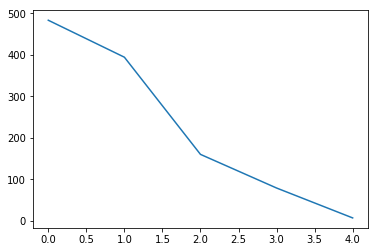

Real Percentage of gain: 107.67511440682179
Percentage of gain: 1.9590036734481748
Total gain: 2201.9201289557486
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 17  83]
 [ 92 290]]
0.6369294605809128
Percentile:  1
[[ 34 113]
 [ 20 227]]
0.6624365482233503
Percentile:  2
[[78 39]
 [ 0 43]]
0.75625
Percentile:  3
[[40 14]
 [ 0 25]]
0.8227848101265823
Percentile:  4
[[5 2]
 [0 0]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... INTC
8.726655348047547
0.0
Diff in tren train and test
0.6323627472771727
0.5480427046263345
F1,score 0.6790197250448297
G-score: 0.18570720604470403
Accuracy 0.5222419928825622
Window: 140
[[ 19 489]
 [ 48 568]]
Vol pos 2.856428486616947
Vol neg 2.3409562846202605


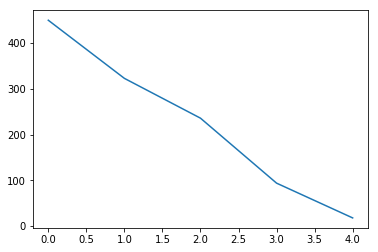

Real Percentage of gain: -76.44781850943792
Percentage of gain: 0.3733362960881388
Total gain: 419.629996803068
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 12 243]
 [ 21 174]]
0.41333333333333333
Percentile:  1
[[  3 128]
 [  7 185]]
0.5820433436532507
Percentile:  2
[[  1  79]
 [  9 147]]
0.6271186440677966
Percentile:  3
[[ 0 30]
 [ 9 55]]
0.5851063829787234
Percentile:  4
[[3 8]
 [1 6]]
0.5
000000000000000000000000000000000000000000000000
Working on... CSCO
9.03573836817263
0.022497187851514083
Diff in tren train and test
0.6958648288128056
0.5569395017793595
F1,score 0.4935289042277825
G-score: 0.4798638557881486
Accuracy 0.4777580071174377
Window: 140
[[251 247]
 [340 286]]
Vol pos 3.0810547759665123
Vol neg 2.7704171359835783


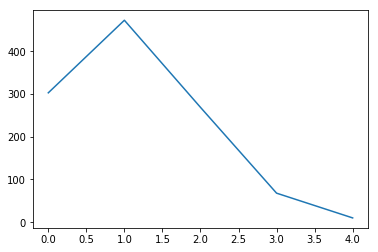

Real Percentage of gain: -8.241905322531096
Percentage of gain: 0.02517042337336013
Total gain: 28.291555871656783
000000000000000000000000000000000000000000000000
Percentile:  0
[[73 80]
 [98 52]]
0.41254125412541254
Percentile:  1
[[ 86  79]
 [149 161]]
0.52
Percentile:  2
[[51 73]
 [86 59]]
0.40892193308550184
Percentile:  3
[[31 15]
 [ 6 14]]
0.6818181818181818
Percentile:  4
[[9]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.5300133392618942
0.3265124555160142
F1,score 0.4878048780487804
G-score: 0.2216589919358744
Accuracy 0.34608540925266906
Window: 140
[[ 39 718]
 [ 17 350]]
Vol pos 1.7102654824225447
Vol neg 3.512739274565046


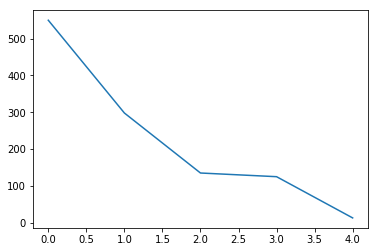

Real Percentage of gain: -160.28043277612534
Percentage of gain: -1.7051335357143587
Total gain: -1916.570094142939
000000000000000000000000000000000000000000000000
Percentile:  0
[[  5 264]
 [  9 272]]
0.5036363636363637
Percentile:  1
[[ 19 198]
 [  8  73]]
0.3087248322147651
Percentile:  2
[[ 10 122]
 [  0   3]]
0.0962962962962963
Percentile:  3
[[  2 123]
 [  0   0]]
0.016
Percentile:  4
[[ 3 10]
 [ 0  0]]
0.23076923076923078
000000000000000000000000000000000000000000000000
Working on... NVDA
12.503503222965135
0.0035687861774766046
Diff in tren train and test
0.6728161813736386
0.5062277580071174
F1,score 0.6556886227544911
G-score: 0.5598718732987005
Accuracy 0.5907473309608541
Window: 140
[[226 329]
 [131 438]]
Vol pos 5.118031805852442
Vol neg 3.457923884940611


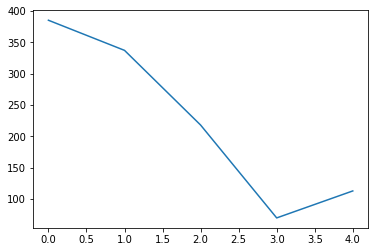

Real Percentage of gain: 117.40118606654514
Percentage of gain: 1.608299049833933
Total gain: 1807.7281320133407
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 67 161]
 [ 64  92]]
0.4140625
Percentile:  1
[[ 58  60]
 [ 54 165]]
0.6617210682492581
Percentile:  2
[[44 70]
 [ 7 97]]
0.6467889908256881
Percentile:  3
[[18 28]
 [ 0 24]]
0.6
Percentile:  4
[[38 10]
 [ 6 59]]
0.8584070796460177
000000000000000000000000000000000000000000000000
Working on... NFLX
15.45532205706476
0.000314100933186445
Diff in tren train and test
0.6327256558470431
0.5249110320284698
F1,score 0.6884480746791132
G-score: 0.0
Accuracy 0.5249110320284698
Window: 140
[[  0 534]
 [  0 590]]
Vol pos 4.879796094772686
Vol neg 4.987504667044619


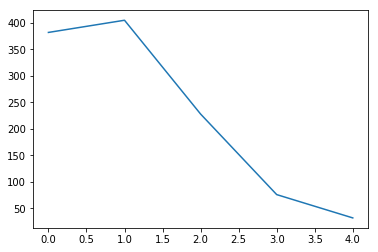

Real Percentage of gain: -158.11007207738183
Percentage of gain: 0.19195035917620815
Total gain: 215.75220371405794
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 195]
 [  0 186]]
0.4881889763779528
Percentile:  1
[[  0 160]
 [  0 245]]
0.6049382716049383
Percentile:  2
[[  0 120]
 [  0 108]]
0.47368421052631576
Percentile:  3
[[ 0 53]
 [ 0 23]]
0.3026315789473684
Percentile:  4
[[ 0  6]
 [ 0 26]]
0.8125
000000000000000000000000000000000000000000000000
Working on... ADBE
8.86251771924074
0.006687024942609625
Diff in tren train and test
0.7191460973982655
0.6476868327402135
F1,score 0.7612375948628137
G-score: 0.37746856489318087
Accuracy 0.6361209964412812
Window: 140
[[ 63 333]
 [ 76 652]]
Vol pos 3.2555998845582583
Vol neg 2.782849152974799


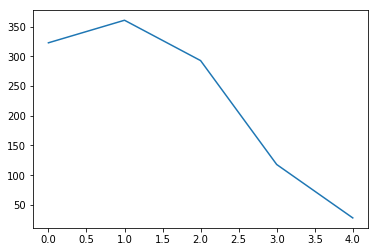

Real Percentage of gain: 87.89970313374563
Percentage of gain: 1.0583350657406243
Total gain: 1189.5686138924618
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 17 107]
 [ 34 165]]
0.5634674922600619
Percentile:  1
[[  6 110]
 [ 26 218]]
0.6222222222222222
Percentile:  2
[[  7  71]
 [ 13 202]]
0.7133105802047781
Percentile:  3
[[26 39]
 [ 3 50]]
0.6440677966101694
Percentile:  4
[[ 6  6]
 [ 0 16]]
0.7857142857142857
000000000000000000000000000000000000000000000000
Working on... AMGN
10.349753955235727
0.0
Diff in tren train and test
0.5235765124555161
0.41725978647686834
F1,score 0.5182926829268293
G-score: 0.5726134787659029
Accuracy 0.5782918149466192
Window: 140
[[395 260]
 [214 255]]
Vol pos 2.7811249007216
Vol neg 2.2390647767633136


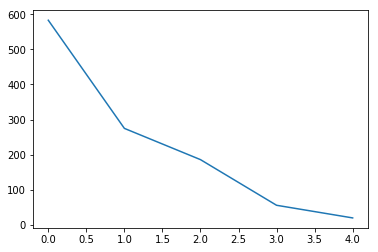

Real Percentage of gain: 40.71422650025328
Percentage of gain: 0.6640698232057202
Total gain: 746.4144812832294
000000000000000000000000000000000000000000000000
Percentile:  0
[[129 104]
 [181 169]]
0.5111492281303602
Percentile:  1
[[118  48]
 [ 30  79]]
0.7163636363636363
Percentile:  2
[[93 86]
 [ 0  7]]
0.5376344086021505
Percentile:  3
[[35 21]
 [ 0  0]]
0.625
Percentile:  4
[[19  1]
 [ 0  0]]
0.95
000000000000000000000000000000000000000000000000
Working on... TXN
7.862921552586133
0.0
Diff in tren train and test
0.7260395819435179
0.4991103202846975
F1,score 0.6414835164835164
G-score: 0.44677585692498745
Accuracy 0.5355871886120996
Window: 140
[[135 428]
 [ 94 467]]
Vol pos 2.241998713791866
Vol neg 2.9445985467080424


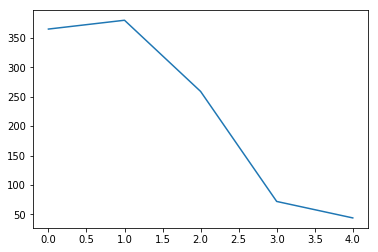

Real Percentage of gain: -11.75292628097464
Percentage of gain: -0.16672350149367862
Total gain: -187.39721567889478
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 34 100]
 [ 42 189]]
0.6109589041095891
Percentile:  1
[[ 44 129]
 [ 40 167]]
0.5552631578947368
Percentile:  2
[[ 39 105]
 [ 11 104]]
0.5521235521235521
Percentile:  3
[[15 52]
 [ 0  5]]
0.2777777777777778
Percentile:  4
[[ 3 41]
 [ 0  0]]
0.06818181818181818
000000000000000000000000000000000000000000000000
Working on... AVGO
10.457419664977998
0.00430904468480171
Diff in tren train and test
0.5334667556148543
0.4359430604982206
F1,score 0.5672333848531685
G-score: 0.48241796934609255
Accuracy 0.501779359430605
Window: 140
[[197 437]
 [123 367]]
Vol pos 4.412876416730009
Vol neg 3.890554230735795


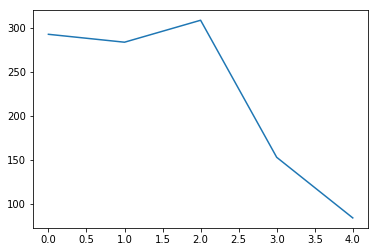

Real Percentage of gain: -32.44603583191626
Percentage of gain: 0.27593588062604973
Total gain: 310.1519298236799
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 22 158]
 [ 20  93]]
0.3924914675767918
Percentile:  1
[[ 23 110]
 [ 28 122]]
0.5123674911660777
Percentile:  2
[[ 51 103]
 [ 40 115]]
0.5372168284789643
Percentile:  3
[[60 42]
 [23 28]]
0.5751633986928104
Percentile:  4
[[41 24]
 [12  8]]
0.5764705882352941
000000000000000000000000000000000000000000000000
Working on... PYPL
8.327716159078378
0.012520345561543904
Diff in tren train and test
0.7356602934637617
0.5080071174377224
F1,score 0.5907473309608541
G-score: 0.59082309579956
Accuracy 0.5907473309608541
Window: 140
[[332 221]
 [239 332]]
Vol pos 3.366284908632024
Vol neg 3.1636896332217144


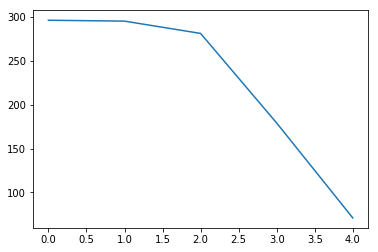

Real Percentage of gain: 19.609768790424507
Percentage of gain: 0.6938753986207076
Total gain: 779.9159480496753
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 50  50]
 [ 92 106]]
0.5234899328859061
Percentile:  1
[[ 51  31]
 [ 79 131]]
0.6232876712328768
Percentile:  2
[[85 63]
 [57 77]]
0.574468085106383
Percentile:  3
[[110  39]
 [ 11  18]]
0.7191011235955056
Percentile:  4
[[35 37]
 [ 0  0]]
0.4861111111111111
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.514342895263509
0.2891459074733096
F1,score 0.30645161290322576
G-score: 0.46569420101723014
Accuracy 0.5409252669039146
Window: 140
[[494 305]
 [211 114]]
Vol pos 2.876183645380238
Vol neg 4.069843073298499


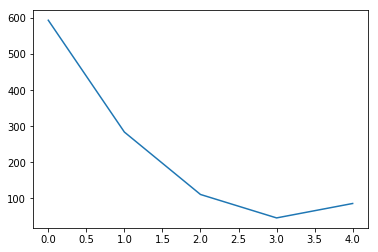

Real Percentage of gain: -130.54355978146359
Percentage of gain: -0.3125617165754812
Total gain: -351.3193694308409
000000000000000000000000000000000000000000000000
Percentile:  0
[[253 127]
 [133  81]]
0.5622895622895623
Percentile:  1
[[141  37]
 [ 73  33]]
0.6126760563380281
Percentile:  2
[[83 25]
 [ 3  0]]
0.7477477477477478
Percentile:  3
[[11 35]
 [ 0  0]]
0.2391304347826087
Percentile:  4
[[ 6 80]
 [ 0  0]]
0.06976744186046512
000000000000000000000000000000000000000000000000
Working on... COST
8.488340192043896
0.004804743406256087
Diff in tren train and test
0.6551800800355714
0.5151245551601423
F1,score 0.6593059936908517
G-score: 0.6024567703417097
Accuracy 0.6156583629893239
Window: 140
[[274 271]
 [161 418]]
Vol pos 1.8080866736937686
Vol neg 1.302960975423266


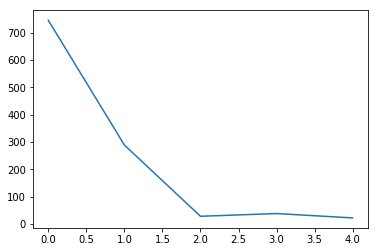

Real Percentage of gain: 68.35579622693407
Percentage of gain: 0.6123815274139119
Total gain: 688.316836813237
000000000000000000000000000000000000000000000000
Percentile:  0
[[191 199]
 [115 240]]
0.5785234899328859
Percentile:  1
[[82 72]
 [38 97]]
0.6193771626297578
Percentile:  2
[[ 0  0]
 [ 4 24]]
0.8571428571428571
Percentile:  3
[[ 0  0]
 [ 4 34]]
0.8947368421052632
Percentile:  4
[[22]]
1.0
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.5105579017559457
0.349644128113879
F1,score 0.5218033998521804
G-score: 0.3903401562292164
Accuracy 0.42437722419928825
Window: 140
[[124 607]
 [ 40 353]]
Vol pos 2.711488860994638
Vol neg 4.1939037732198905


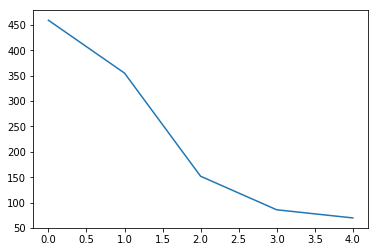

Real Percentage of gain: -125.77268607465186
Percentage of gain: -1.263412415105718
Total gain: -1420.075554578827
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 31 164]
 [ 29 235]]
0.579520697167756
Percentile:  1
[[ 37 207]
 [ 10 101]]
0.38873239436619716
Percentile:  2
[[ 21 114]
 [  0  17]]
0.25
Percentile:  3
[[22 64]
 [ 0  0]]
0.2558139534883721
Percentile:  4
[[12 58]
 [ 0  0]]
0.17142857142857143
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5572360616844603
Mean gain over portfolio :  461.07429169599123
Real mean gain over portfolio 1.5225829466062462


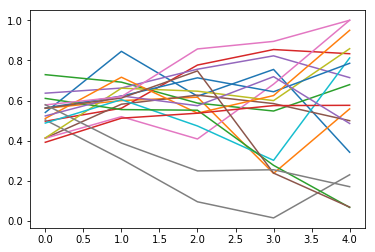

In [7]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

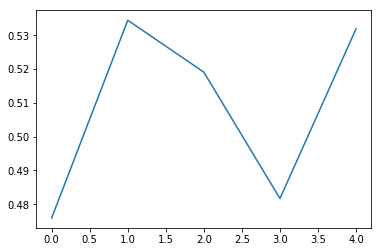

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.270476249727803
0.017456627217776497
Diff in tren train and test
0.6066052572455628
0.5242805755395683
F1,score 0.7171903881700555
G-score: 0.7251734415382601
Accuracy 0.7248201438848921
Window: 200
[[418 111]
 [195 388]]
Vol pos 4.655973560000202
Vol neg 5.104018541265666


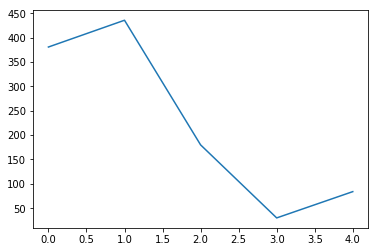

Real Percentage of gain: 268.40162246576114
Percentage of gain: 1.9702203378892706
Total gain: 2190.885015732869
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 77  54]
 [ 93 158]]
0.6151832460732984
Percentile:  1
[[199  55]
 [ 11 171]]
0.8486238532110092
Percentile:  2
[[135   1]
 [ 25  18]]
0.8547486033519553
Percentile:  3
[[ 7  0]
 [ 9 13]]
0.6896551724137931
Percentile:  4
[[ 0  0]
 [56 28]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... AMZN
14.276472876599362
0.0025179720253285087
Diff in tren train and test
0.6880898876404494
0.6519784172661871
F1,score 0.6701298701298701
G-score: 0.4022922823765951
Accuracy 0.5431654676258992
Window: 200
[[ 88 299]
 [209 516]]
Vol pos 4.276313442786288
Vol neg 5.284110199143333


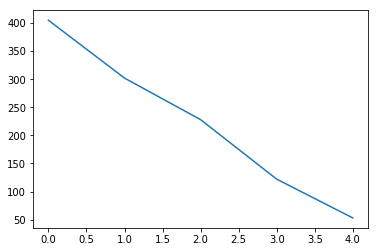

Real Percentage of gain: -56.287499974216416
Percentage of gain: -0.09121822097292741
Total gain: -101.43466172189528
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 39  82]
 [ 78 206]]
0.6049382716049383
Percentile:  1
[[  9  86]
 [ 57 150]]
0.5264900662251656
Percentile:  2
[[ 16  41]
 [ 54 117]]
0.5833333333333334
Percentile:  3
[[20 40]
 [20 42]]
0.5081967213114754
Percentile:  4
[[ 4 49]
 [ 0  0]]
0.07547169811320754
000000000000000000000000000000000000000000000000
Working on... GOOGL
12.349750870849691
0.0019559137050855525
Diff in tren train and test
0.6046302539896606
0.4721223021582734
F1,score 0.6795539033457249
G-score: 0.5763461638847309
Accuracy 0.612410071942446
Window: 200
[[224 363]
 [ 68 457]]
Vol pos 4.692755330624939
Vol neg 4.064208886987443


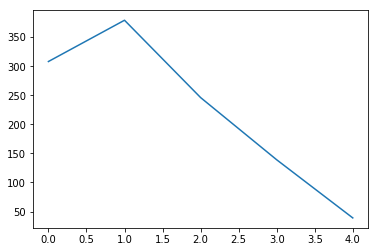

Real Percentage of gain: 92.94165258191738
Percentage of gain: 1.2986441995179812
Total gain: 1444.092349863995
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 20 127]
 [ 20 140]]
0.5211726384364821
Percentile:  1
[[ 35 125]
 [ 11 208]]
0.6411609498680739
Percentile:  2
[[ 43  77]
 [ 18 108]]
0.6138211382113821
Percentile:  3
[[92 28]
 [18  1]]
0.6690647482014388
Percentile:  4
[[34  6]
 [ 0  0]]
0.85
000000000000000000000000000000000000000000000000
Working on... MSFT
7.57977313685995
0.0
Diff in tren train and test
0.6791732195012357
0.5224820143884892
F1,score 0.6760299625468165
G-score: 0.6884078053420426
Accuracy 0.6888489208633094
Window: 200
[[405 126]
 [220 361]]
Vol pos 2.7607670892352942
Vol neg 2.26872119954509


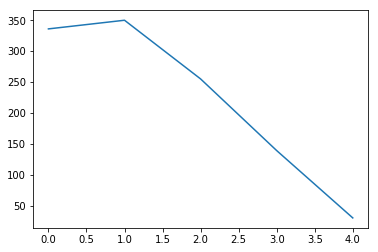

Real Percentage of gain: 163.61205020145417
Percentage of gain: 1.19583638067593
Total gain: 1329.7700553116342
000000000000000000000000000000000000000000000000
Percentile:  0
[[117  46]
 [ 87  86]]
0.6041666666666666
Percentile:  1
[[150  45]
 [ 54 101]]
0.7171428571428572
Percentile:  2
[[ 75  18]
 [ 59 103]]
0.6980392156862745
Percentile:  3
[[51 17]
 [16 55]]
0.762589928057554
Percentile:  4
[[11  0]
 [ 3 16]]
0.9
000000000000000000000000000000000000000000000000
Working on... FB
18.18673883626522
0.012662234884445591
Diff in tren train and test
0.5832397214109188
0.6366906474820144
F1,score 0.8286802030456853
G-score: 0.6568711400112106
Accuracy 0.7571942446043165
Window: 200
[[189 215]
 [ 55 653]]
Vol pos 5.899227892905895
Vol neg 5.103013686503045


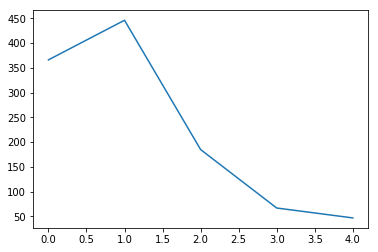

Real Percentage of gain: 316.73158157710975
Percentage of gain: 3.2278203151717095
Total gain: 3589.336190470941
000000000000000000000000000000000000000000000000
Percentile:  0
[[  2  81]
 [ 41 243]]
0.667574931880109
Percentile:  1
[[ 36  58]
 [ 14 336]]
0.8378378378378378
Percentile:  2
[[72 57]
 [ 0 56]]
0.6918918918918919
Percentile:  3
[[32 17]
 [ 0 18]]
0.746268656716418
Percentile:  4
[[46  1]
 [ 0  0]]
0.9787234042553191
000000000000000000000000000000000000000000000000
Working on... INTC
12.666315789473686
0.0
Diff in tren train and test
0.6580543698045384
0.5692446043165468
F1,score 0.4834663625997719
G-score: 0.5590518388604756
Accuracy 0.5926258992805755
Window: 200
[[447  32]
 [421 212]]
Vol pos 3.066520959108471
Vol neg 2.5534085940110116


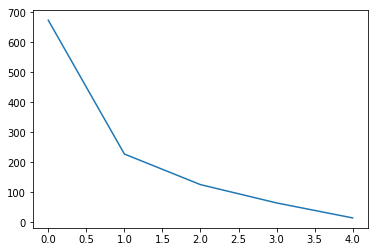

Real Percentage of gain: 159.7386937642163
Percentage of gain: 0.7771072112999047
Total gain: 864.143218965494
000000000000000000000000000000000000000000000000
Percentile:  0
[[302  30]
 [257  85]]
0.5741839762611276
Percentile:  1
[[104   2]
 [ 89  33]]
0.6008771929824561
Percentile:  2
[[36  0]
 [51 39]]
0.5952380952380952
Percentile:  3
[[ 5  0]
 [22 38]]
0.6615384615384615
Percentile:  4
[[15]]
1.0
000000000000000000000000000000000000000000000000
Working on... CSCO
10.270935960591137
0.011134617525877858
Diff in tren train and test
0.72
0.5800359712230215
F1,score 0.6717428087986463
G-score: 0.6564941071506049
Accuracy 0.6510791366906474
Window: 200
[[327 140]
 [248 397]]
Vol pos 3.7272220679860113
Vol neg 2.920539380183748


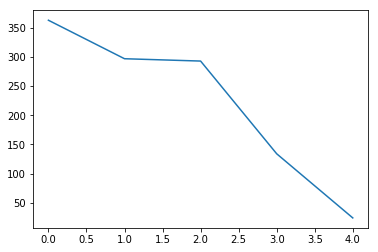

Real Percentage of gain: 103.25474414957998
Percentage of gain: 1.4076794044159873
Total gain: 1565.339497710578
000000000000000000000000000000000000000000000000
Percentile:  0
[[103  32]
 [135  92]]
0.5386740331491713
Percentile:  1
[[ 73  27]
 [ 68 130]]
0.6812080536912751
Percentile:  2
[[ 96  56]
 [ 26 115]]
0.7201365187713311
Percentile:  3
[[50 24]
 [16 43]]
0.6992481203007519
Percentile:  4
[[ 5  1]
 [ 2 17]]
0.88
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.116774878445044
0.01483679525223311
Diff in tren train and test
0.5597752808988764
0.2392086330935252
F1,score 0.38690909090909087
G-score: 0.05954913341754136
Accuracy 0.24190647482014388
Window: 200
[[  3 843]
 [  0 266]]
Vol pos 1.8373090269822976
Vol neg 4.118741459110142


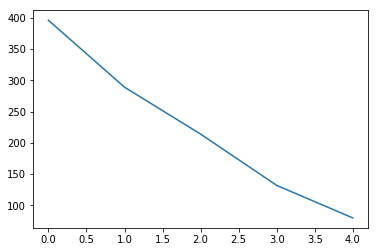

Real Percentage of gain: -230.94174956414733
Percentage of gain: -2.6779342821687155
Total gain: -2977.8629217716116
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 230]
 [  0 167]]
0.42065491183879095
Percentile:  1
[[  1 206]
 [  0  80]]
0.28222996515679444
Percentile:  2
[[  2 193]
 [  0  19]]
0.09813084112149532
Percentile:  3
[[  0 136]
 [  0   0]]
0.0
Percentile:  4
[[ 0 77]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
16.150883867675034
0.021939447125924945


In [ ]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()